![logo.jpg](logo.jpg) 
### Observation de l'amas ***NGC 206***<br>

###### Dominique Touzan.
###### 1. https://sites.google.com/view/astronomie-ut1/accueil
###### 2. dtouzan@gmail.com
###### 3. Jupyter Notebook : 

###### **Édition**   1.0, révision 11/11/2019

##### **Résumé** : Observation annuelle de l'amas NGC 206 de la galaxie Messier 31.

###### ***Mots-clés*** : Amas - NGC 206 - Messier 31 - Astropy - Jupyter
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)

In [2]:
# Date    :04/09/2019
# Autheur :Dominique Touzan, dtouzan@gmail.com
# Importation des modules
#           numpy       : Informatique scientifique 
#           matplotlib  : Mathématique,dessin
#           datetime    : Temps
#           astropy     : Astronomie
#           aplpy       : Astronomie
#           astroplan   : Astronomie
#
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime

from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.table as vstack
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
from astropy.utils import iers
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import aplpy
#import astroplan
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration pour le cache IERS
iers.conf.auto_download = False 

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

In [15]:
# Importation des fichiers de données
#           UT1_MAST_CATALOG       : Catalogue UT1 Mast
#           data_milky_way         : Catalogue d'étoiles
#           data_SMCLMC            : Catalogue SMC LMC
#           data_AAVSO             : Mesures AAVSO
data = ascii.read("UT1_MAST_CATALOG.csv",data_start=3,format='csv')
data_milky_way = ascii.read("data_Milky_Way.csv",data_start=1,format='csv')
data_SMCLMC = ascii.read("data_SMCLMC.csv",data_start=1,format='csv')

# Longitude et latitude de UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

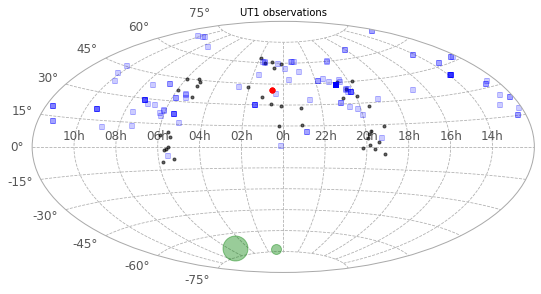

In [16]:
# Objet rechrercher dans le catalogue UT1 Mast
data_search='NGC 206'

# Configuration du dessin
fig = plt.figure(figsize=(9,5))
# Configuration de la projecion cartographique du titre et grille 
ax = fig.add_subplot(111,projection='aitoff')
plt.grid(True,axis='both',linestyle='--')
plt.title('UT1 observations', fontsize=10)

# Dessin des constellations
for ligne in data_milky_way:
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, 'o', color='black', markersize=3, alpha=0.6)

# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]!=data_search:
        marker_color='blue'
        marker_type='s'
        marker_alpha=0.2
        marker_label=''
        # RA et DEC en degré    
        ra=ligne[10]*u.deg
        dec=ligne[11]*u.deg
        # Configuration de la position en ICRS
        c = SkyCoord(ra, dec, frame='icrs')
        # RA et DEC en radian et repositionnement
        ra_rad = -c.ra.wrap_at(180 * u.deg).radian
        dec_rad = c.dec.radian
        # Affichage sur la projection
        plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]==data_search:
        marker_color='red'
        marker_alpha=0.8
        marker_label=''
        marker_type='o'
        # RA et DEC en degré
        ra=ligne[10]*u.deg
        dec=ligne[11]*u.deg
        # Configuration de la position en ICRS
        c = SkyCoord(ra, dec, frame='icrs')
        # RA et DEC en radian et repositionnement
        ra_rad = -c.ra.wrap_at(180 * u.deg).radian
        dec_rad = c.dec.radian
        # Affichage sur la projection
        plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Dessin des SMC LMC
for ligne in data_SMCLMC:
    name=ligne[2]
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    if name == "smc":
        marker_size=10
    else:
        marker_size=25
    plt.plot(ra_rad, dec_rad, 'o', color='green', markersize=marker_size, alpha=0.4)
    
# Modification des labels en heure
ax.set_xticklabels(['10h','08h','06h','04h','02h','0h','22h','20h','18h','16h','14h'])
# Affichage
plt.show()

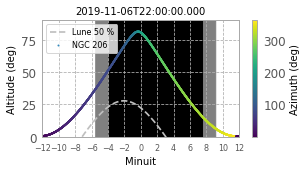

In [19]:
# Affichage des hauteurs
#       Example gallery            : astropy
# Ajout de l'illumination de la Lune 
# Nom de l'astre rechercher au CDS
name_astre='NGC 206'

# Dates de l'observation
dates_obs = ['2019-11-07T00:00:00']
# soirées de l'observation à minnuit
dates_midnight = ['2019-11-07T00:00:00']
# % illumination de la Lune
moon_phase = [50]

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# taille du canevas
plt.figure(figsize=(15,15))

index = 0
for date in dates_obs:
    # initialisation de la date d'observation
    # module astropy
    date_observation = Time(date, format='isot', scale='utc') - utcoffset
    midnight = Time(dates_midnight[index], format='isot', scale='utc') - utcoffset
    # Azimuth et hauteur de l'astre
    # module astropy
    astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))
    # Azimuth et hauteur du Soleil
    # module astropy
    delta_midnight = np.linspace(-12, 12, 2000)*u.hour
    times_dates = midnight + delta_midnight
    frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
    sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)
    # Azimuth, hauteur
    # module astropy
    # Illumination de la Lune module astroplan
    moon_dates = get_moon(times_dates)
    moonaltazs_dates = moon_dates.transform_to(frame_dates)
    #k=int(astroplan.moon_illumination(date_observation)*100)
    k=moon_phase[index]
    # Azimuth et hauteur de l'astre
    # module astropy
    astrealtazs_dates = astre_altaz.transform_to(frame_dates)
    #
    # Dessin 
    #
    plt.subplot(5, 3, index+1)
    plt.grid(True,axis='both',linestyle='--')
    # Tracé de la Lune, couleur et label avec % d'illumination
    plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
    # Tracé de l'astre, label et couleur
    plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
    # tracé de la nuit (pénombre)
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
    # Tracé de la nuit total
    plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)
    # Trace du titre
    plt.title(str(date_observation), fontsize=10)
    # Tracé du label "Azimuh"
    plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
    # tracé des légendes
    plt.legend(loc='upper left', fontsize=8)
    # Tracé de la grille Horaire
    plt.xlim(-12, 12)
    plt.xticks(np.arange(13)*2 -12, fontsize=8)
    # Tracé de la grille d'altitude
    plt.ylim(0, 90)
    # Tracé du label "Minuit" sur axe X
    plt.xlabel('Minuit', fontsize=10)
    # Tracé du label "Altitude"
    plt.ylabel('Altitude (deg)', fontsize=10)
    index = index+1

# Affichage
plt.show()

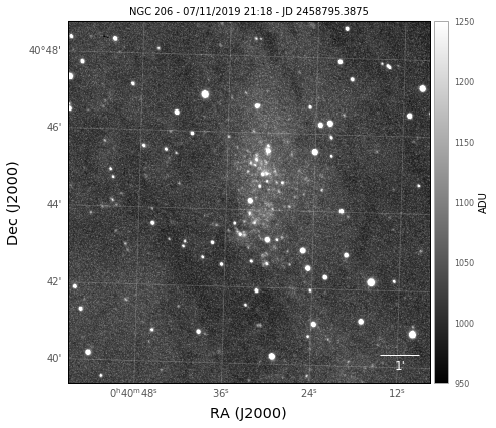

In [8]:
# Coordonées Aladin Sky Atlas
# Intitulée v2492 cyg
coord_astre = SkyCoord.from_name('ngc 206')
v_ra = coord_astre.ra*u.deg
v_dec = coord_astre.dec*u.deg

data_image = [['NGC206-20191107.fits',950,1250,'NGC 206 - 07/11/2019 21:18 - JD 2458795.3875']]

# Affichage des images de référence
fig = plt.figure(figsize=(15,15))
index = 0
for line in data_image:
    f1=aplpy.FITSFigure(data_image[index][0],figure=fig, subplot=(1,2,index+1))
    f1.add_grid()
    f1.grid.set_color('white')
    f1.grid.set_alpha(0.2)
    f1.add_scalebar(0.017)
    f1.scalebar.set_label("1'")
    f1.scalebar.set_color('white')
    f1.tick_labels.set_font(size='small')
    f1.show_grayscale(vmin=data_image[index][1], vmax=data_image[index][2])
    plt.title(data_image[index][3],fontsize=10)
    f1.add_colorbar()
    f1.colorbar.set_width(0.2)
    f1.colorbar.set_axis_label_text('ADU')
    f1.colorbar.set_axis_label_font(size=10)
    f1.colorbar.set_font(size=8)
    index = index + 1
  